# cutoff.py

## Date: 2021-09-29

In [1]:
# Load library
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from scipy import signal

In [ ]:
PATH_IN = 

In [ ]:
'''
# # Task Steps: 
# 1. load data
# 2. data에서 rr-interval 개수 확인
# 3. 90%, 95% 식으로 cutoff설정
# 4. cutoff설정된 값으로 return되는 value, value개수 확인
# 5. optional 눈으로 graph를 겹쳐보아요~!

'''

In [ ]:
pd.read_csv(os.path.join(PATH_IN, ))

In [2]:
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arr\cosine_sim'

os.chdir(PATH_IN)
cos_sim_arr = [i for i in os.listdir(PATH_IN)]

In [5]:
df = pd.read_csv(cos_sim_arr[0])
len(df), round(len(df)*0.95,0), np.round(len(df)*0.90,0)

(2271, 2157.0, 2044.0)

In [15]:
df['cos_sim'][int(round(len(df)*0.95,0)-1)]
df.loc[int(round(len(df)*0.95,0)-1)]

Unnamed: 0         2156.000000
index              1003.000000
cos_sim               0.999278
original_points     276.000000
Name: 2156, dtype: float64

Text(0.5, 1.0, 'A')

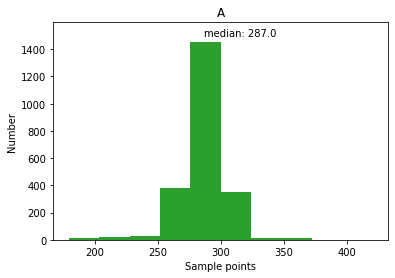

In [75]:
plt.hist(df['original_points'])
plt.xlabel('Sample points')
plt.ylabel('Number')
plt.ylim(0,max(plt.hist(df['original_points'])[0])*1.1)
plt.text(np.median(df['original_points'])*1.0000, max(plt.hist(df['original_points'])[0]*1.03), 'median: {}'.format(np.median(df['original_points'])))
#plt.grid()
plt.title('A')

In [99]:
# PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arr\cosine_sim'
# os.chdir(PATH_IN)

def set_cut_off(PATH_IN, cut_off_value1, cut_off_value2):
    
    os.chdir(PATH_IN)
    cos_sim = [i for i in os.listdir(PATH_IN)]
    origin_cos_disc = pd.DataFrame()
#    header = 'subject'  + ','+  'datatype'  + ','+  'origin_len'  + ','+   'cut_off1_length' + ','+  'cut_off2_length' + ','+ 'cut_off1_value' + ','+ 'cut_off2_value'+ ','+  'median_origin_len'+ ','+  'mean_origin_len'+ ','+  'std_origin_len'+ ','+  'min_origin_len'+ ','+  '25%_origin_len' + ','+ '50%_origin_len' + ','+  '75%_origin_len' + ','+ 'max__origin_len'
    
    for i in range(len(cos_sim)):
        
        datatype = cos_sim[0].split('.csv')[0].split('_')[2]
        subject = cos_sim[0].split('.csv')[0].split('_')[3]
        ref = cos_sim[0].split('.csv')[0].split('_')[4]
        
        df = pd.read_csv(cos_sim[i])
#         cutoff = str(len(df)) + ','+  str(round(len(df)*cut_off_value2,0)) + ','+  str(np.round(len(df)*cut_off_value2,0)) + ','+ '\n'
        
        # find cut-off's value and length
        org_len = len(df)
        cut1_len = np.round(len(df)*cut_off_value1,0)
        cut1_value = df['cos_sim'][int(round(len(df)*cut_off_value1,0)-1)]
        cut2_len = np.round(len(df)*cut_off_value2,0)
        cut2_value = df['cos_sim'][int(round(len(df)*cut_off_value2,0)-1)]
        
        # Condsier outliers in original points 
        # point_des1 = df['original_points'].describe()['count']
        point_des1 = np.median(df['original_points'])
        point_des2 = df['original_points'].describe()['mean']
        point_des3 = df['original_points'].describe()['std']
        point_des4 = df['original_points'].describe()['min']
        point_des5 = df['original_points'].describe()['25%']
        point_des6 = df['original_points'].describe()['50%']
        point_des7 = df['original_points'].describe()['75%']
        point_des8 = df['original_points'].describe()['max']
    
        tmp_df = pd.DataFrame({'subject': subject, 'datatype': datatype,  'origin_len': org_len,  'cut_off1_length':cut1_len, 'cut_off2_length': cut2_len, 'cut_off1_value':cut1_value, 
          'cut_off2_value':cut1_value, 'median_origin_len':point_des1, 'mean_origin_len':point_des2, 'std_origin_len': point_des3, 'min_origin_len':point_des4, 
          '25%_origin_len':point_des5, '50%_origin_len':point_des6, '75%_origin_len':point_des7, 'max__origin_len':point_des8}, index = ['{}_{}'.format(dataype, subject)])
#                               index = ['subject', 'datatype', 'origin_len','cut_off1_length','cut_off2_length','cut_off1_value','cut_off2_value','median_origin_len','mean_origin_len',
#                                        'std_origin_len','min_origin_len','25%_origin_len','50%_origin_len','75%_origin_len','max__origin_len']
        
        try: 
            mkdir(os.path.join(PATH_IN, 'cos_disc'))
        except: 
            pass
        
        # 
        origin_cos_disc.append(tmp_df)
                              
        # save the distribution of original points                       
        plt.hist(df['original_points'])
        plt.xlabel('Sample points')
        plt.ylabel('Number')
        plt.ylim(0,max(plt.hist(df['original_points'])[0])*1.1)
        plt.text(np.median(df['original_points'])*1.0000, max(plt.hist(df['original_points'])[0]*1.03), 'median: {}'.format(np.median(df['original_points'])))
        plt.title('The distribution of original points: {}_{}'.format(datatype, subject))
        plt.savefig('{}\\cos_disc\\{}_{}_{}.png'.format(PATHIN, datatype, subject, ref))
        break
                              
    origin_cos_disc.to_csv(os.path.join(PATH_IN, cos_disc, 'cos_dis.csv'), sep=',')

## Final codes

In [275]:
# Final code 
def set_cut_off(PATH_IN, cut_off_value1, cut_off_value2):
    os.chdir(PATH_IN)
    cos_sim = [i for i in os.listdir(PATH_IN)]
    origin_cos_disc = pd.DataFrame()
    colunm_name = ['subject', 'datatype', 'origin_len', 'cut_off: {}'.format(cut_off_value1), 'cut_off: {}'.format(cut_off_value2),'cut_off1_value','cut_off2_value','median_origin_len','mean_origin_len', 'std_origin_len','min_origin_len','25%_origin_len','50%_origin_len','75%_origin_len','max__origin_len']

    cos_disc = pd.DataFrame(columns= colunm_name)    
    for i in range(len(cos_sim)):

        if cos_sim[i].endswith('.csv'):
            datatype = cos_sim[i].split('.csv')[0].split('_')[2]
            subject = cos_sim[i].split('.csv')[0].split('_')[3]
            ref = cos_sim[i].split('.csv')[0].split('_')[4]
            
            print('>>>>> processing: {}'.format(subject))

            df = pd.read_csv(cos_sim[i])
        #         cutoff = str(len(df)) + ','+  str(round(len(df)*cut_off_value2,0)) + ','+  str(np.round(len(df)*cut_off_value2,0)) + ','+ '\n'

            # find cut-off's value and length
            org_len = len(df)
            cut1_len = np.round(len(df)*cut_off_value1,0)
            cut1_value = df['cos_sim'][int(round(len(df)*cut_off_value1,0)-1)]
            cut2_len = np.round(len(df)*cut_off_value2,0)
            cut2_value = df['cos_sim'][int(round(len(df)*cut_off_value2,0)-1)]

            # Condsier outliers in original points 
            # point_des1 = df['original_points'].describe()['count']
            point_des1 = np.median(df['original_points'])
            point_des2 = df['original_points'].describe()['mean']
            point_des3 = df['original_points'].describe()['std']
            point_des4 = df['original_points'].describe()['min']
            point_des5 = df['original_points'].describe()['25%']
            point_des6 = df['original_points'].describe()['50%']
            point_des7 = df['original_points'].describe()['75%']
            point_des8 = df['original_points'].describe()['max']

            tmp_df = pd.DataFrame({'subject': subject, 'datatype': datatype,  'origin_len': org_len,  'cut_off: {}'.format(cut_off_value1) :cut1_len, 'cut_off: {}'.format(cut_off_value2): cut2_len, 'cut_off1_value':cut1_value, 
              'cut_off2_value':cut2_value, 'median_origin_len':point_des1, 'mean_origin_len':point_des2, 'std_origin_len': point_des3, 'min_origin_len':point_des4, 
              '25%_origin_len':point_des5, '50%_origin_len':point_des6, '75%_origin_len':point_des7, 'max__origin_len':point_des8}, index = ['{}_{}'.format(datatype, subject)])
#         #                               index = ['subject', 'datatype', 'origin_len','cut_off1_length','cut_off2_length','cut_off1_value','cut_off2_value','median_origin_len','mean_origin_len',
#         #                                        'std_origin_len','min_origin_len','25%_origin_len','50%_origin_len','75%_origin_len','max__origin_len']

            # 
#             globals()['df_{}'.format(subject)] = pd.DataFrame({'subject': subject, 'datatype': datatype,  'origin_len': org_len,  cut_off_value1:cut1_len, cut_off_value2: cut2_len, 'cut_off1_value':cut1_value, 
#               'cut_off2_value':cut1_value, 'median_origin_len':point_des1, 'mean_origin_len':point_des2, 'std_origin_len': point_des3, 'min_origin_len':point_des4, 
#               '25%_origin_len':point_des5, '50%_origin_len':point_des6, '75%_origin_len':point_des7, 'max__origin_len':point_des8}, index = ['{}_{}'.format(datatype, subject)])
            
            try:
                #print(os.path.join(PATH_IN, 'cos_disc'))
                os.mkdir(os.path.join(PATH_IN, 'cos_disc'))

            except: 
                pass #print('Already made')


            # save the distribution of original points                       
            fig = plt.figure()
            y, x, _= plt.hist(df['original_points'])
            plt.xlabel('Sample points')
            plt.ylabel('Number')
            plt.ylim(0,max(y)*1.1)
            plt.text(np.median(df['original_points'])*1.0000, max(y)*1.03, 'median: {}'.format(np.median(df['original_points'])))
            plt.title('The distribution of original points: {}_{}'.format(datatype, subject))
            fig.savefig(os.path.join(PATH_IN, 'cos_disc\{}_{}_{}.png'.format(datatype, subject, ref)))
            plt.close(fig)

            # plt.savefig('fig1.png', dpi=300)
        
            # update dataframe 
            # origin_cos_disc.show()
            
            cos_disc = cos_disc.append(tmp_df)
        else:
            print('It is not *.csv file')


    cos_disc.to_csv(os.path.join(PATH_IN, 'cos_disc', 'cos_dis.csv'), sep=',')
    print("=========== Fin ========== ")

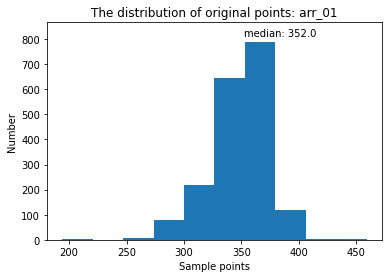

In [269]:
## example
# fig = plt.figure()
# y, x, _= plt.hist(df['original_points'])
# plt.xlabel('Sample points')
# plt.ylabel('Number')
# plt.ylim(0,max(y)*1.1)
# plt.text(np.median(df['original_points'])*1.0000, max(y)*1.03, 'median: {}'.format(np.median(df['original_points'])))
# plt.title('The distribution of original points: {}_{}'.format(datatype, subject))
# fig.savefig(r'C:\Users\MI2RL-KHJ\test.png')

In [190]:
PATH_IN =  r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arr\cosine_sim'
cut_off_value1 = 0.9
cut_off_value2 = 0.95
set_cut_off(PATH_IN, cut_off_value1, cut_off_value2)

It is not *.csv file
>>>>> processing: 00
>>>>> processing: 01
>>>>> processing: 02
>>>>> processing: 03
>>>>> processing: 04
>>>>> processing: 05
>>>>> processing: 06
>>>>> processing: 07
>>>>> processing: 08
>>>>> processing: 09
>>>>> processing: 10
>>>>> processing: 11
>>>>> processing: 12
>>>>> processing: 13
>>>>> processing: 14
>>>>> processing: 15
>>>>> processing: 16
>>>>> processing: 17
>>>>> processing: 18
>>>>> processing: 19
>>>>> processing: 20
>>>>> processing: 21
>>>>> processing: 22
>>>>> processing: 23
>>>>> processing: 24
>>>>> processing: 25
>>>>> processing: 26
>>>>> processing: 27
>>>>> processing: 28
>>>>> processing: 29
>>>>> processing: 30
>>>>> processing: 31
>>>>> processing: 32
>>>>> processing: 33
>>>>> processing: 34
>>>>> processing: 35
>>>>> processing: 36
>>>>> processing: 37
>>>>> processing: 38
>>>>> processing: 39
>>>>> processing: 40
>>>>> processing: 41
>>>>> processing: 42
>>>>> processing: 43
>>>>> processing: 44
>>>>> processing: 45
>>>>> process

In [276]:
PATH_IN =  r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm\cosine_sim'
cut_off_value1 = 0.9
cut_off_value2 = 0.95
set_cut_off(PATH_IN, cut_off_value1, cut_off_value2)

It is not *.csv file
>>>>> processing: 00
>>>>> processing: 01
>>>>> processing: 02
>>>>> processing: 03
>>>>> processing: 04
>>>>> processing: 05
>>>>> processing: 06
>>>>> processing: 07
>>>>> processing: 08
>>>>> processing: 09
>>>>> processing: 10
>>>>> processing: 11
>>>>> processing: 12
>>>>> processing: 13
>>>>> processing: 14
>>>>> processing: 15
>>>>> processing: 16
>>>>> processing: 17
It is not *.csv file
=========== Fin ========== 


In [214]:
PATH_IN =  r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arrx\cosine_sim'
cut_off_value1 = 0.9
cut_off_value2 = 0.95
set_cut_off(PATH_IN, cut_off_value1, cut_off_value2)

>>>>> processing: 08
>>>>> processing: 09
>>>>> processing: 10
>>>>> processing: 11
>>>>> processing: 12
>>>>> processing: 13
>>>>> processing: 14
>>>>> processing: 15
>>>>> processing: 16
>>>>> processing: 19
>>>>> processing: 20
>>>>> processing: 21
>>>>> processing: 22
>>>>> processing: 38
>>>>> processing: 39
>>>>> processing: 40
>>>>> processing: 41
>>>>> processing: 42
>>>>> processing: 43
>>>>> processing: 44
>>>>> processing: 45
>>>>> processing: 46
>>>>> processing: 47
=========== Fin ========== 
